In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.matlib import repmat
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import pandas as pd

%matplotlib inline

## `eigsort.m`

In [2]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [3]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Plot features of raw data in relation to death

<AxesSubplot:xlabel='age', ylabel='high_blood_pressure'>

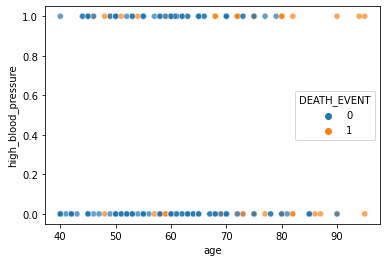

In [5]:
sns.scatterplot(x=data['age'], y=data['high_blood_pressure'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='serum_sodium', ylabel='diabetes'>

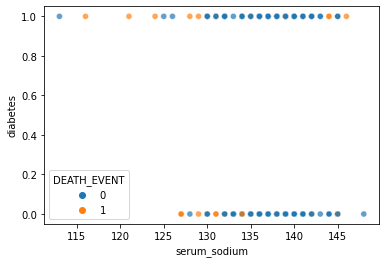

In [6]:
sns.scatterplot(x=data['serum_sodium'], y=data['diabetes'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='serum_sodium', ylabel='ejection_fraction'>

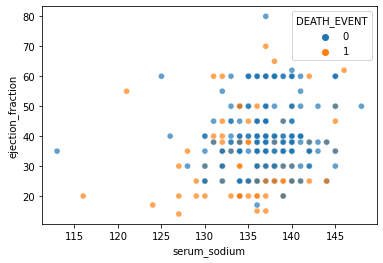

In [7]:
# ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
sns.scatterplot(x=data['serum_sodium'], y=data['ejection_fraction'],alpha=0.7, hue=data['DEATH_EVENT'])

<AxesSubplot:xlabel='high_blood_pressure', ylabel='ejection_fraction'>

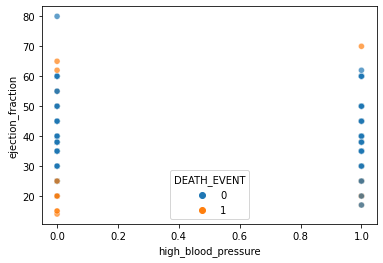

In [8]:
# ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
sns.scatterplot(x=data['high_blood_pressure'], y=data['ejection_fraction'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='serum_sodium', ylabel='platelets'>

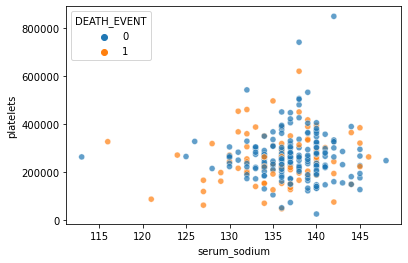

In [9]:
# platelets: platelets in the blood (kiloplatelets/mL)
# a small colourless disc-shaped cell fragment without a nucleus - involved in clotting
sns.scatterplot(x=data['serum_sodium'], y=data['platelets'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='serum_sodium', ylabel='creatinine_phosphokinase'>

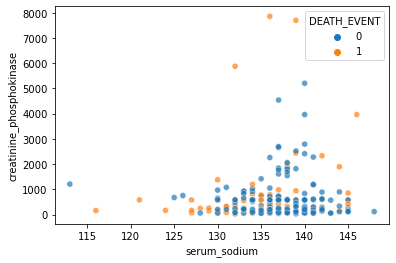

In [10]:
sns.scatterplot(x=data['serum_sodium'], y=data['creatinine_phosphokinase'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='platelets'>

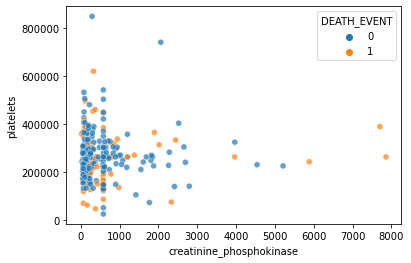

In [11]:
# platelets: platelets in the blood (kiloplatelets/mL)
# a small colourless disc-shaped cell fragment without a nucleus - involved in clotting
sns.scatterplot(x=data['creatinine_phosphokinase'], y=data['platelets'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='age', ylabel='creatinine_phosphokinase'>

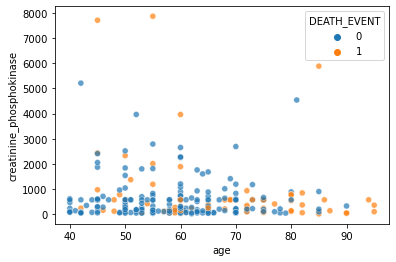

In [12]:
sns.scatterplot(x=data['age'], y=data['creatinine_phosphokinase'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='ejection_fraction', ylabel='creatinine_phosphokinase'>

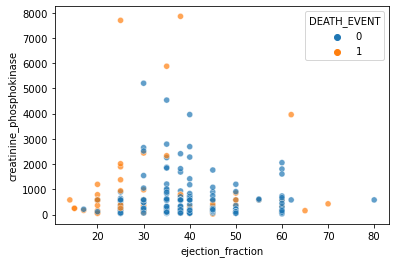

In [13]:
sns.scatterplot(x=data['ejection_fraction'], y=data['creatinine_phosphokinase'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='age', ylabel='creatinine_phosphokinase'>

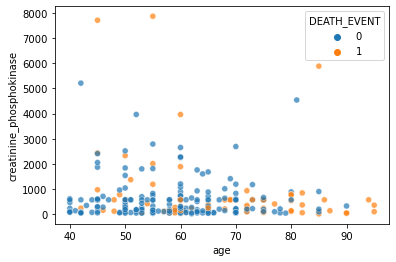

In [14]:
sns.scatterplot(x=data['age'], y=data['creatinine_phosphokinase'], hue=data['DEATH_EVENT'], alpha=0.7)

<AxesSubplot:xlabel='age', ylabel='serum_sodium'>

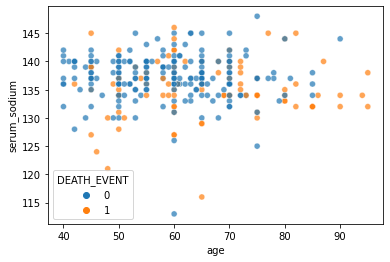

In [15]:
sns.scatterplot(x=data['age'], y=data['serum_sodium'], hue=data['DEATH_EVENT'], alpha=0.7)

## Spectral Clustering on Age and Serum Sodium

In [16]:
d1 = data['age'].values
d2 = data['serum_sodium'].values

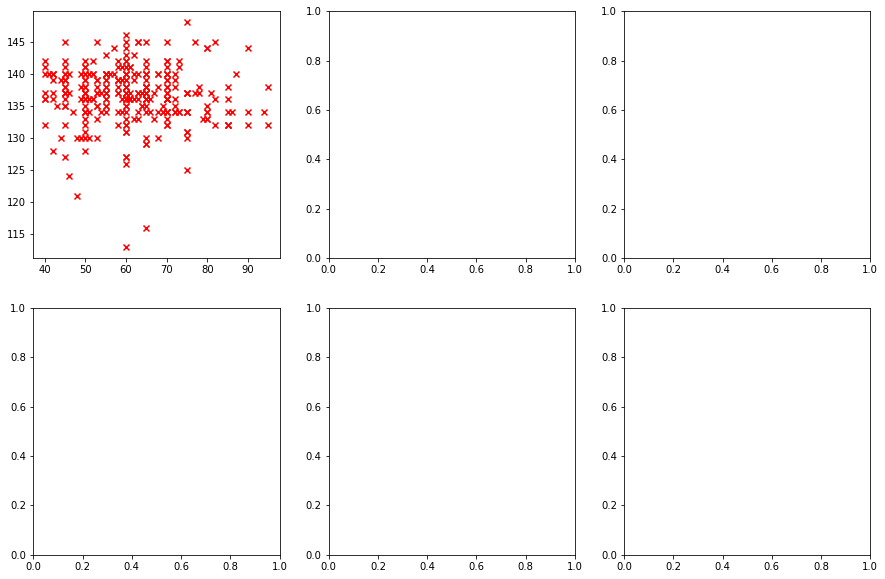

In [17]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

ax = axes[0,0]
ax.scatter(d1, d2, c='r', marker='x')
#ax.scatter(d2, d2, c='b', marker='x')

cluster1 = d1
cluster2 = d2

allpts = np.vstack((cluster1, cluster2)).T
goto = np.shape(allpts)[0]

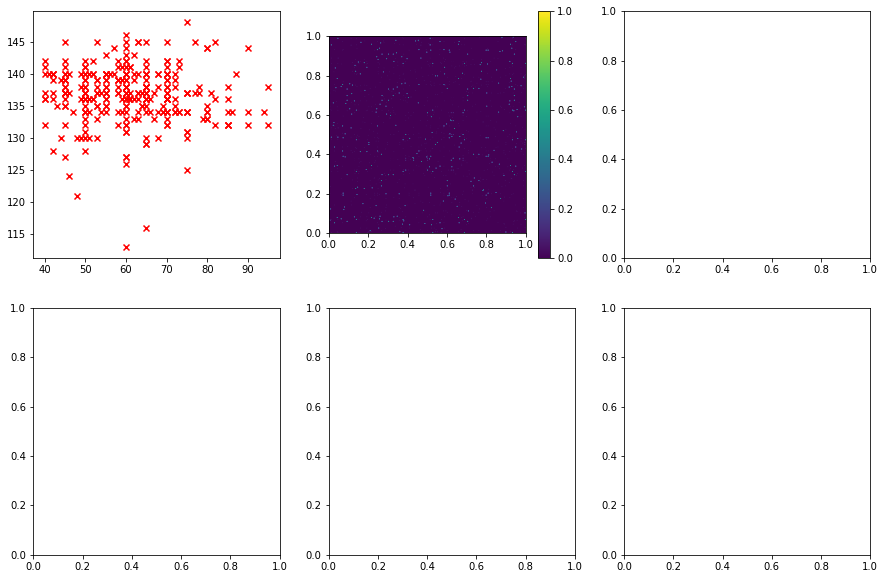

In [18]:
# calculate similarity/affinity matrix (step 1)
sigsq = 0.2
Aisq = np.power(allpts[:,0], 2) + np.power(allpts[:,1], 2)
Dotprod = allpts.dot(allpts.T)

distmat = - repmat(Aisq, goto, 1) - repmat(Aisq.reshape(-1,1), 1, goto)  + 2*Dotprod
Afast = np.exp(distmat / (2*sigsq))
A = Afast - np.diag(np.diag(Afast))

ax = axes[0,1]
im = ax.imshow(A, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

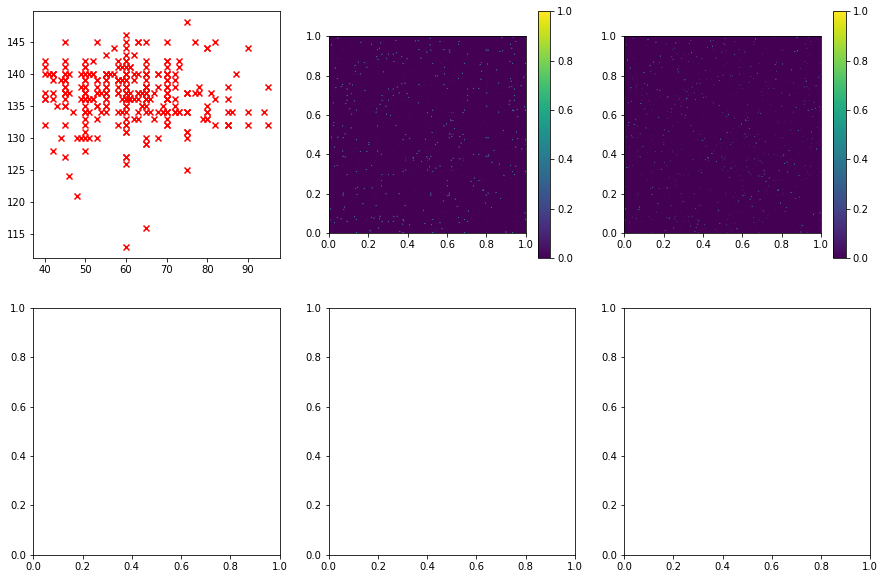

In [19]:
# step 2
D = np.diag(np.sum(A.T, axis=0))
L = np.linalg.inv(np.sqrt(D)).dot(A).dot(np.linalg.inv(np.sqrt(D)))
ax = axes[0,2]
im = ax.imshow(L, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

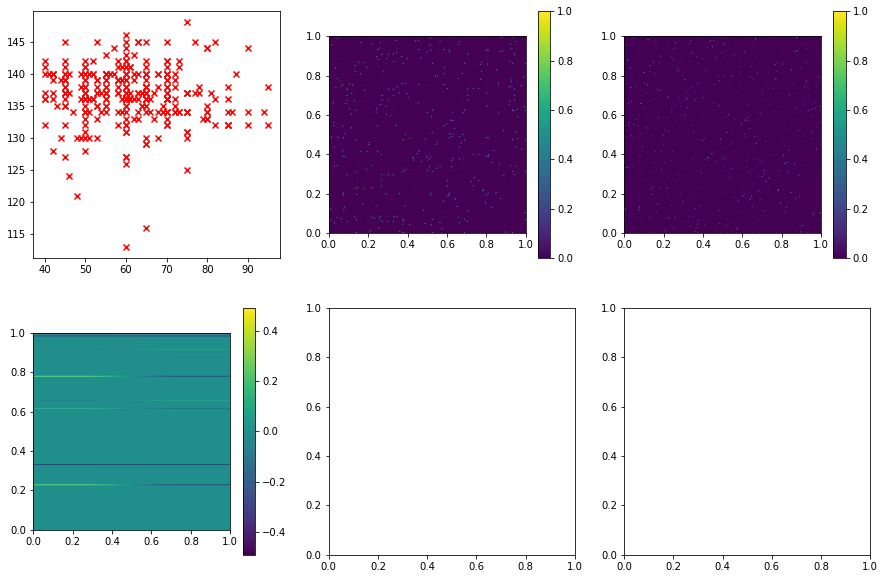

In [20]:
# step 3 
di, X = np.linalg.eig(L)
Xsort, Dsort = eigsort(X,di)
Xuse = Xsort[:, :2]
ax = axes[1,0]
im = ax.imshow(Xuse, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

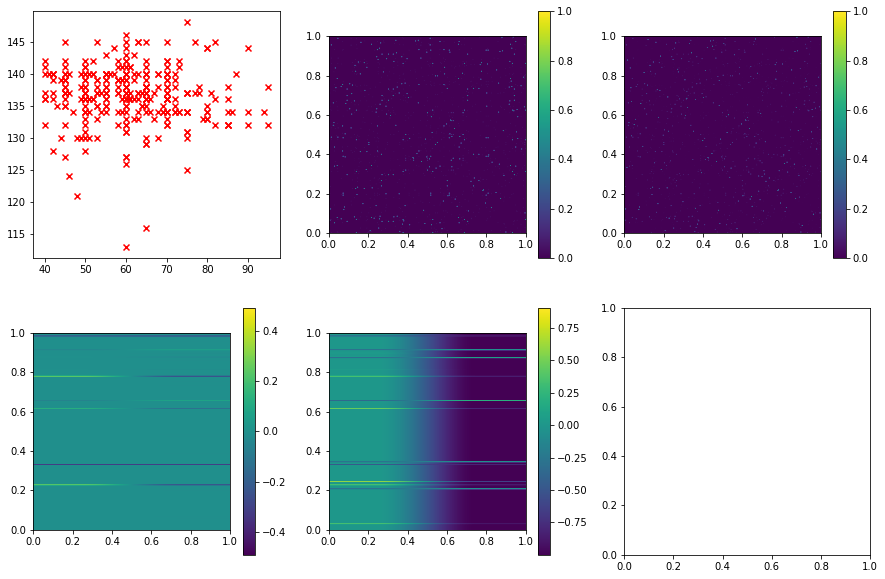

In [21]:
# normalize X to get Y (step 4)
Xsq = np.multiply(Xuse, Xuse)
divmat = repmat(np.sqrt(np.sum(Xsq.T, axis=0)).reshape(-1,1), 1, 2)
Y = np.divide(Xuse, divmat)
ax = axes[1,1]
im = ax.imshow(Y, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

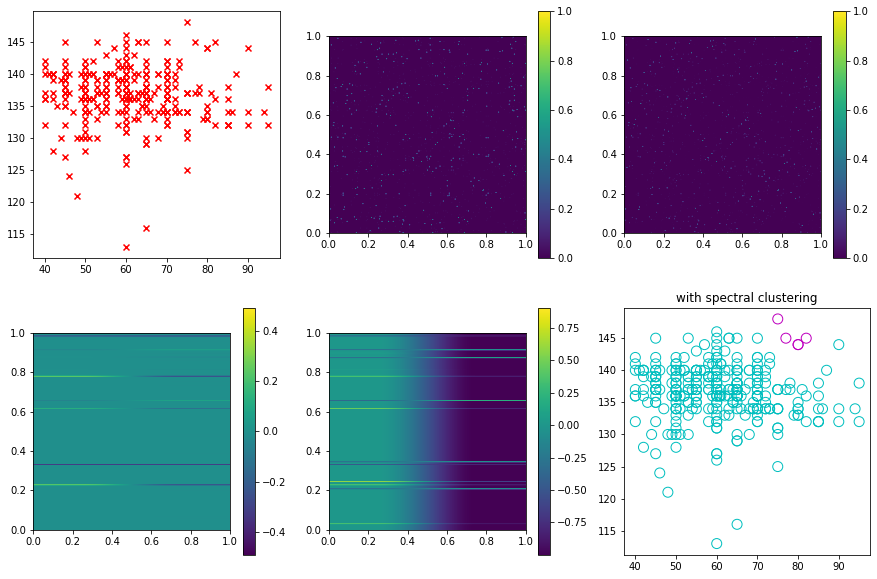

In [22]:
# step 5/6
kmeans = KMeans(n_clusters=2).fit(Y)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[1,2]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with spectral clustering')
fig

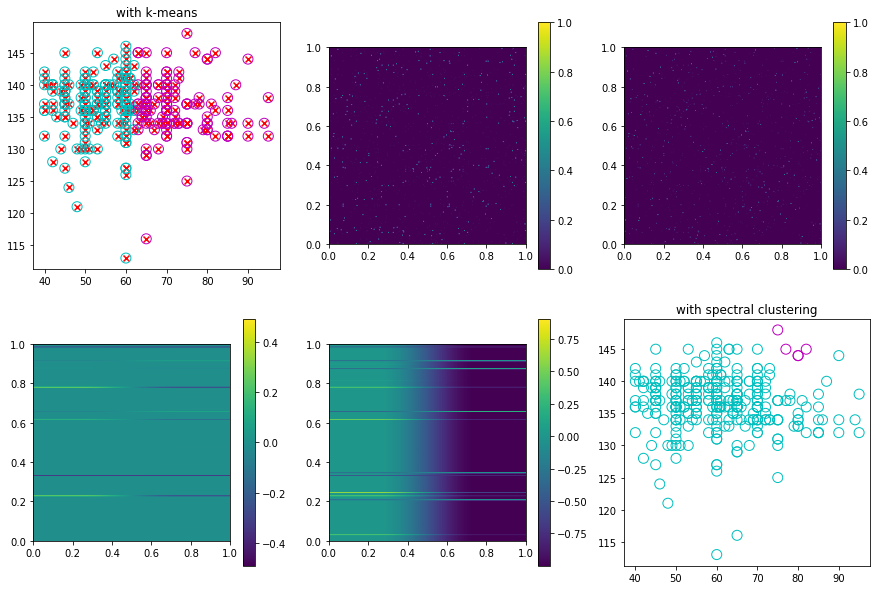

In [23]:
# For comparison run kmeans on original data
kmeans = KMeans(n_clusters=2).fit(allpts)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[0, 0]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with k-means')
fig

## Spectral Clustering with sklearn

In [24]:
# Perform spectral clustering from features, or affinity matrix, and return cluster labels
cluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(data.iloc[:,:-1])
cluster

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtyp

### Plot the cluster labels returned with sklearn's spectral clustering algorithm

In [25]:
data['cluster'] = cluster

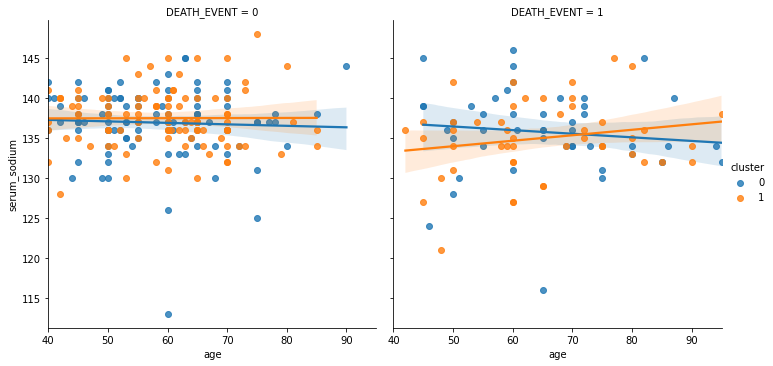

In [26]:
# shows how many of the original death data that spectral clustering actually grouped correctly
sns.lmplot(x='age', y='serum_sodium', col='DEATH_EVENT', hue='cluster', data=data)

Text(0.5, 1.0, 'Raw Data of Death Clusters')

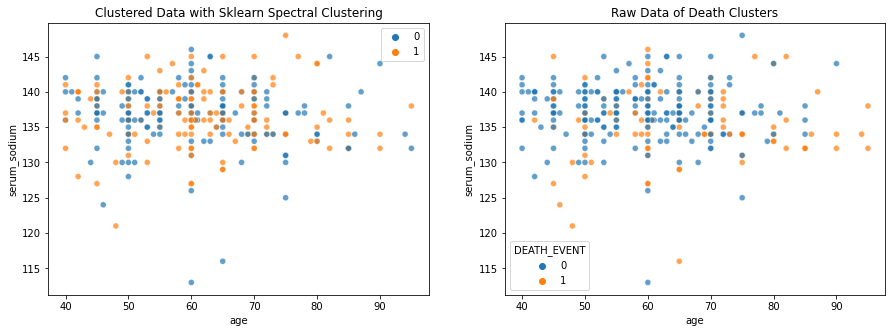

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x=data['age'], y=data['serum_sodium'], hue=cluster, alpha=0.7, ax=axs[0])
# original data of age and serum_sodium 
sns.scatterplot(x=data['age'], y=data['serum_sodium'], hue=data['DEATH_EVENT'], alpha=0.7, ax=axs[1])

axs[0].set_title('Clustered Data with Sklearn Spectral Clustering')
axs[1].set_title('Raw Data of Death Clusters')

<AxesSubplot:xlabel='age', ylabel='platelets'>

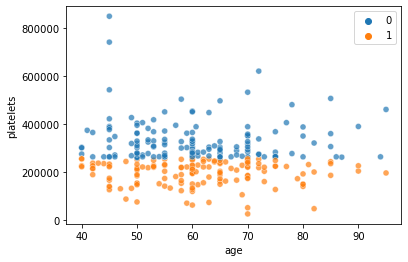

In [28]:
sns.scatterplot(x=data['age'], y=data['platelets'], hue=cluster, alpha=0.7)

<AxesSubplot:xlabel='age', ylabel='serum_creatinine'>

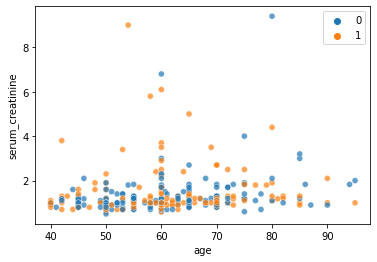

In [29]:
sns.scatterplot(x=data['age'], y=data['serum_creatinine'], alpha=0.7, hue=cluster)

<AxesSubplot:xlabel='age', ylabel='creatinine_phosphokinase'>

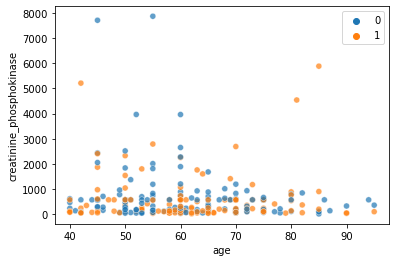

In [30]:
sns.scatterplot(x=data['age'], y=data['creatinine_phosphokinase'], alpha=0.7, hue=cluster)